# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [2]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: Principal component analysis (PCA) uses  orthogonal transformation to decouple several correlated variables into a set of linearly uncorrelated variables. Also the first PCA variables has the largest possible variables. So the first PCA dimension must has "fresh" variables, whose variance is greatest among the six.

(Independent component analysis) ICA is used for separating a multivariate data into additive subcomponents.  In ICA, we're finding vectors that are statistically independent of the projected data. This will be used for creating a clear boundary such that the dimensions are not dependent on each other. In this dataset, we would expected that the ICA dimension may like "food purchase", "office supply", "home cleaning".

###PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


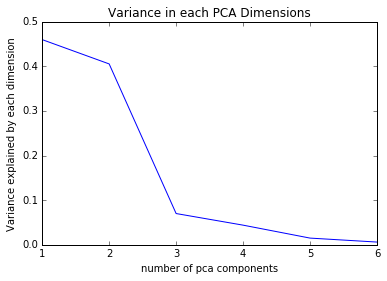

In [3]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

plt.figure()
plt.plot(np.arange(1,7),pca.explained_variance_ratio_)
plt.xlabel("number of pca components")
plt.ylabel("Variance explained by each dimension")
plt.title("Variance in each PCA Dimensions")

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: For the figure above, we can see that most variances are from the first two dimensions. So the variance explained by each dimension drop off very quickly from 2 to 3, after 3, it drops very slow. So I believe that only 2 dimensions are enough to describe the whole database variances.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first dimensions includes a major portion of Fresh, the a small portion of Frozen production
The second dimensions includes similar amount portion of Milk and Grocery, and a small portion of Detergents_paper.

This means only two PCA dimensions can express the most of variances. Based on the reduction by PCA, we can reduce the amount the computation and also remain most of the information.

###ICA

[[ -2.42104378e-07   2.92357041e-06   1.12268087e-05  -1.52494690e-06
   -2.78247254e-05  -5.85487190e-06]
 [ -8.57283796e-07  -2.14587690e-07   8.98928097e-07   1.11481779e-05
   -6.26141781e-07  -5.94033909e-06]
 [  3.43913182e-07   7.42647423e-06  -1.78313578e-06  -1.32981143e-07
    2.67405011e-06  -5.56477313e-06]
 [ -3.97176663e-06   1.00248134e-06   9.21883147e-07   6.73147096e-07
   -2.52908135e-06   7.98220498e-07]
 [ -3.93739238e-07  -3.05770874e-07  -7.14512947e-07  -5.20160723e-07
    6.16471658e-07   1.82138216e-05]
 [ -1.47681719e-07   6.46310507e-06  -9.51018215e-06  -2.47163881e-07
    4.85191788e-06  -1.61239513e-06]]


C:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


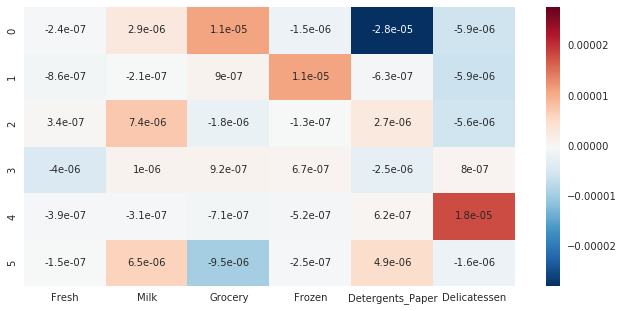

In [4]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components = 6)
ica.fit(data - data.mean())
# Print the independent components
print ica.components_

import seaborn as sns
#plotting heat map for better visulisation of matrix
plt.figure(figsize = (11,5))
sns.heatmap(pd.DataFrame(ica.components_,
                         columns = list(data.columns)),annot = True)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 
 * The first component of ICA primarily consists of Frozen and Delicatessen.
 * The second component consists of Delicatessen, Milk, Grocery, Frozen
 * The third component consists of Delicatessen, fresh.
 * The fourth component consists of Delicatessen.
 * the fifth component consists of Fresh, Milk, Detergents_paper
 * the sixth component consists of Milk, Detergents_paper, and Fresh
 
The ICA is just a method to decompose the multivariate data into independent non-Gaussian signals. In the clustering, it is important to have independent features

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: K means is a "simple", relative fast method to do "hard" assignments, which means one data point is definitely belong to only one group. K means is good for points are well separated. While Gaussian Mixture Models is a "soft" assignment, it is suitable for points are mixed together.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [5]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [6]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components = 2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [7]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
clusters_2 = GMM(n_components = 2).fit(reduced_data)
clusters_3 = GMM(n_components = 3).fit(reduced_data)
clusters_4 = GMM(n_components = 4).fit(reduced_data)
print clusters_2
print clusters_3
print clusters_4

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


In [8]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters_2.predict(np.c_[xx.ravel(), yy.ravel()])

In [9]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters_2.means_
print centroids

[[  3308.39301792  -3017.01739698]
 [-10810.23008886   9858.15532401]]


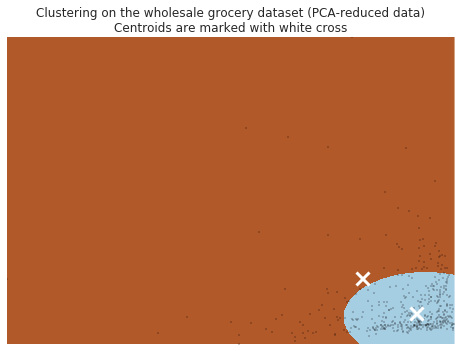

In [11]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

[[-15372.37194307  -3334.43379857]
 [  2339.15204219  -6708.93065712]
 [  7174.54719282   5469.02876453]
 [ -9486.9742574   34645.20428228]]


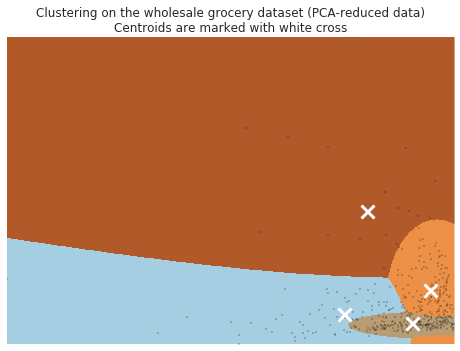

In [10]:
Z = clusters_4.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = clusters_4.means_
print centroids
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

[[  6987.95079141   4249.82914044]
 [-17879.18623839  10122.79246625]
 [   269.05318679  -6506.88683442]]


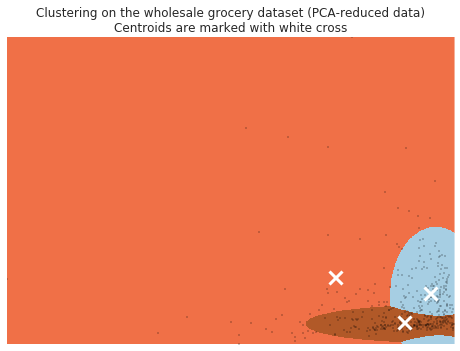

In [11]:
Z = clusters_3.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = clusters_3.means_
print centroids
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Three clustering examples are shown above with 2, 3 and 4 number of clusters, respectively.  Also GMM is used here instead of Kmeans, since the data points don't have a clear edge. The model with 2 cluster doesn't separate the two most clear clusters. The model with 4 cluster looks like having the over-fitting effect, since one region is shrinking, and also create a boundary, which doesn't exist. So the best model is 3 number of clusters

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: From the figure above, we can see that there are roughly three clusters. We can name the horizontal axis as variable 1, and vertical axis is variable 2. The lower right region (red) means the customers has more purchase about variable 1, and upper right region (blue) means the customers has more purchase about variable 2, and less purchase about variable 1. The other region (dark red) can be treated as outliers of the first two region, they has extreme high volume purchase of variable 1 or variable 2, or they has similar purchase amount of variable 1 and variable 2. Since in previous section, we have identified that The first dimensions includes a major portion of Fresh, the a small portion of Frozen production The second dimensions includes similar amount portion of Milk and Grocery, and a small portion of Detergents_paper. I may guess the The lower right region (red) represents the customers like restaurant, the upper right region (red) represents the housewife, and other costumers are just large volume purchase customers.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: PCA techniques enable us reduce the original 6 variables to only 2 independent variables. So we can views the variations in 2D plot, and also reduce the amount of calculation in later clustering.

In clustering, we use Gaussian Mixture Models to separate the customers into 3 different group. In each group, they has different purchase habits, (purchase some categories more than others). This information can enable the owner of wholesale distributor to make better business decision

**9)** How would you use that technique to help the company design new experiments?

Answer: Current, we have separated the customers into three groups. Further, we can perform the A/B test, for example, providing some promotion to the Frese and Frozen products. Then we can do the cluster techniques agian to see whether we can have clearer separation

**10)** How would you use that data to help you predict future customer needs?

Answer: Current, we have separated the customers into three groups. Then we can run the classification algorithms try to build one model to predict the customer category from existing information. If we successfully identify the customers category, then we can supply better service to the targeting group.